In [11]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combined_df = pd.merge(city_data, ride_data, how="left", on=["city", "city"])
# Display the data table for preview
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [17]:
suburban_cities = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])
suburban_cities

## Bubble Plot of Ride Sharing Data

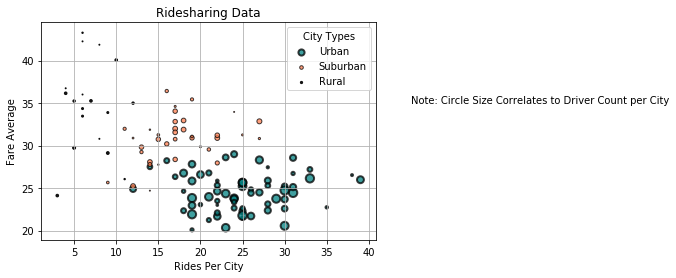

In [41]:
# Obtain the x and y coordinates for each of the three city types
urban_cities = combined_df[combined_df["type"] == "Urban"].groupby([combined_df["city"]])
suburban_cities = combined_df[combined_df["type"] == "Suburban"].groupby([combined_df["city"]])
rural_cities = combined_df[combined_df["type"] == "Rural"].groupby([combined_df["city"]])

urban_x = urban_cities["ride_id"].count()
urban_y = urban_cities["fare"].mean()
urban_s = urban_cities["driver_count"].mean()

suburban_x = suburban_cities["ride_id"].count()
suburban_y = suburban_cities["fare"].mean()
suburban_s = suburban_cities["driver_count"].mean()

rural_x = rural_cities["ride_id"].count()
rural_y = rural_cities["fare"].mean()
rural_s = rural_cities["driver_count"].mean()

# Build the scatter plots for each city types
urban_scatter = plt.scatter(urban_x, urban_y, s=urban_s, alpha=.75, color="teal", 
                            edgecolor="black", linewidths=2, label="Urban")
suburban_scatter = plt.scatter(suburban_x, suburban_y, s=suburban_s, alpha=.75, color="coral", 
                            edgecolor="black", linewidths=1, label="Suburban")
rural_scatter = plt.scatter(rural_x, rural_y, s=rural_s, alpha=.9, color="black", 
                            edgecolor="black", linewidths=1, label="Rural")
plt.tight_layout
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Rides Per City")
plt.ylabel("Fare Average")
plt.title("Ridesharing Data")

# Create a legend
legend = plt.legend(title="City Types", loc="best")
# Incorporate a text label regarding circle size
plt.text(45, 35, "Note: Circle Size Correlates to Driver Count per City")
# Save Figure
plt.savefig('RideShareScatter.png')

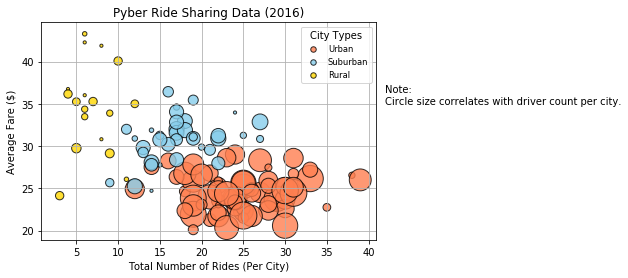

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

Text(0.5, 1.0, 'Total Fare % By City Type')

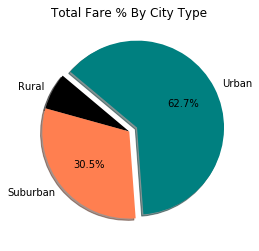

In [83]:
types_grouped = combined_df.groupby(["type"])
fares_sum = types_grouped["fare"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["black", "coral", "teal"]
plt.pie(fares_sum, explode=explode, labels=labels, colors = colors, autopct="%.1f%%",
        shadow=True, startangle=140)
plt.title("Total Fare % By City Type")
plt.savefig("Total Fare % By City Type")


In [63]:
# Show Figure
plt.show()

## Total Rides by City Type

Text(0.5, 1.0, 'Total Ride % By City Type')

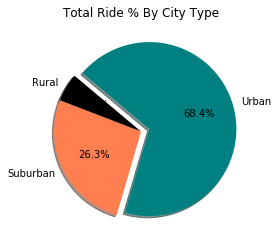

In [84]:
# Calculate Ride Percents
rides_sum = types_grouped["ride_id"].count()

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["black", "coral", "teal"]
plt.pie(rides_sum, explode=explode, labels=labels, colors = colors, autopct="%.1f%%",
        shadow=True, startangle=140)
plt.title("Total Ride % By City Type")
plt.savefig("Total Ride % By City Type")




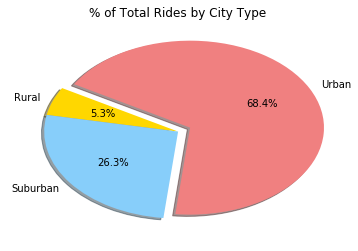

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

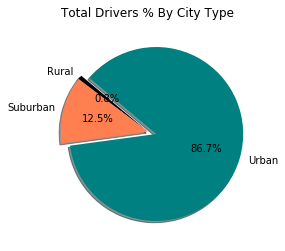

In [86]:
drivers_sum = types_grouped["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, 0.1)
colors = ["black", "coral", "teal"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors = colors, autopct="%.1f%%",
        shadow=True, startangle=140)
plt.title("Total Drivers % By City Type")
plt.savefig("Total Drivers % By City Type")


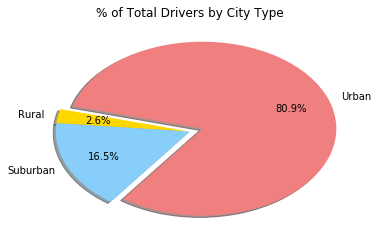

In [6]:
# Show Figure
